In [1]:
!pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

df = pd.read_csv('encode.csv')
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,278451,13,58924,3387,443,6,18-08-2017 09:24,19121,1,1,...,0.0,0.0,0,0,0,0.0,0,0,44,SMSMALWARE_ZSONE
1,8280,13,47222,20,53,17,07-08-2017 12:56,61603,1,1,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
2,200151,11,49027,2009,443,6,07-07-2017 06:09,36801,1,1,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
3,101173,12,40117,426,443,6,17-06-2017 12:12,2945940,3,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
4,180494,13,51540,1529,5001,6,30-06-2017 05:42,1000710,2,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN


In [3]:
df.shape

(21068, 74)

In [4]:
df.isnull().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Original_label      0
Length: 74, dtype: int64

In [5]:
from scikitplot.metrics import plot_precision_recall
import matplotlib.pyplot as plt

In [6]:
def save_model(model, frs, label, out_dir):
    model.fit(frs, label)
    pickle.dump(model, open(out_dir,'wb'))

In [7]:
def validate(in_dir, X_test, y_test, title):
    model = pickle.load(open(in_dir,'rb'))
    y_probas = model.predict_proba(X_test)
    plot_precision_recall(y_test, y_probas, classes_to_plot=[],
                          title=str('Precision-recall curve micro-averaged over all classes for ' + title))
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
all_frs = df[df.columns.difference(['Label', 'Original_label', 'Timestamp'])]

In [10]:
X_scaled = preprocessing.scale(all_frs)

In [11]:
label = df.Label

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, label, test_size=0.3)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

In [14]:
param_grid = {
    'max_features' : [0.5,0.75,1.0],
    'bootstrap' : [True, False],
    'bootstrap_features' : [True, False]
}

In [16]:
CV_bagging = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid, cv=5)
CV_bagging.fit(X_train, y_train)
predictions = CV_bagging.predict(X_test)
CV_bagging.score(X_test, y_test)

0.21325739598164847

In [17]:
CV_bagging.best_params_

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5}

In [18]:
models = [(DummyClassifier(strategy="most_frequent"), 'baseline.pkl', 'Zero R'),
          (BaggingClassifier(bootstrap = False, bootstrap_features = True), 'bagging.pkl', 'Bagging classifier')
         ]

In [19]:
for clr, out_dir, _ in models:    
    save_model(clr, X_train, y_train, out_dir)

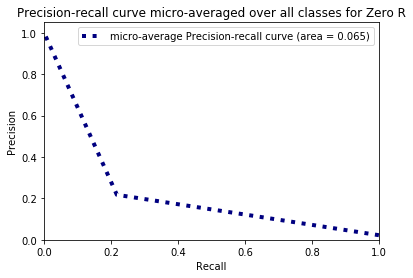

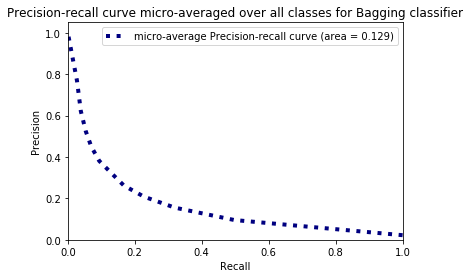

In [20]:
for _, in_dir, title in models:    
    validate(in_dir, X_test, y_test, title)

In [21]:
from scikitplot.estimators import plot_learning_curve

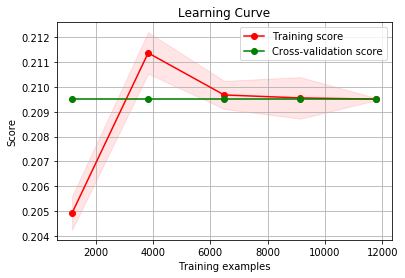

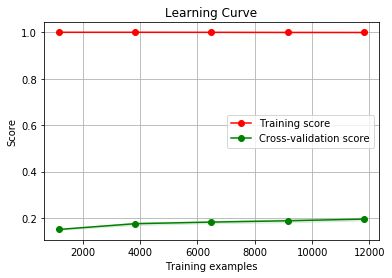

In [22]:
for clr,  out_dir, _ in models:    
    plot_learning_curve(clr, X_train, y_train)


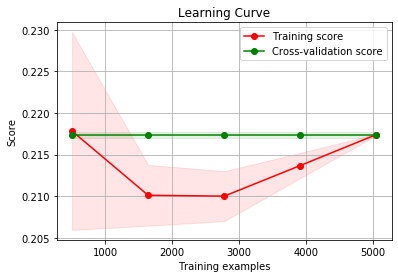

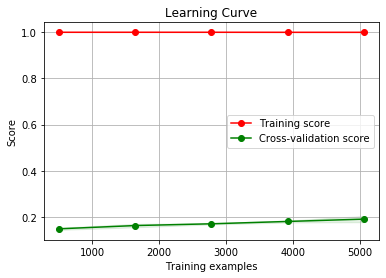

In [23]:
for clr,  out_dir, _ in models:    
    plot_learning_curve(clr, X_test, y_test)

In [24]:
nRowsRead = 20000
df1 = pd.read_csv('encode.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'encode.csv'
nRow, nCol = df1.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 20000 rows and 74 columns


In [25]:
df1[:100]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,278451,13,58924,3387,443,6,18-08-2017 09:24,19121,1,1,...,0.0,0.0,0,0,0,0.0,0,0,44,SMSMALWARE_ZSONE
1,8280,13,47222,20,53,17,07-08-2017 12:56,61603,1,1,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
2,200151,11,49027,2009,443,6,07-07-2017 06:09,36801,1,1,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
3,101173,12,40117,426,443,6,17-06-2017 12:12,2945940,3,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
4,180494,13,51540,1529,5001,6,30-06-2017 05:42,1000710,2,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21805,11,38153,20,53,17,23-06-2017 11:13,50535,1,1,...,0.0,0.0,0,0,0,0.0,0,0,25,SCAREWARE_AVFORANDROID
96,113684,12,56718,884,80,6,07-11-2017 10:13,11065700,5,4,...,0.0,0.0,0,0,0,0.0,0,0,42,SMSMALWARE_PLANKTON
97,20228,11,33118,20,53,17,21-06-2017 08:49,173962,1,1,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
98,234496,1245,80,22,45591,6,20-06-2017 10:52,4066,1,3,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN


In [26]:
df1.dropna(inplace = True) 

In [27]:
df1.drop(columns =["Timestamp"], inplace = True) 

In [28]:
df1.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
 

In [29]:
#df1.drop(columns =["Label"], inplace = True)

In [30]:
df2 = df1

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb_make = LabelEncoder()
#df2["labels"] = lb_make.fit_transform(df2["Protocol"])
df2[["Protocol", "Label"]].head(11)

,Protocol,Label
0,6,44
1,17,10
2,6,10
3,6,10
4,6,10
5,6,30
6,17,22
7,6,17
8,6,10
9,6,20


In [34]:
df2.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,278451,13,58924,3387,443,6,19121,1,1,0,...,0.0,0.0,0,0,0,0.0,0,0,44,SMSMALWARE_ZSONE
1,8280,13,47222,20,53,17,61603,1,1,44,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
2,200151,11,49027,2009,443,6,36801,1,1,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
3,101173,12,40117,426,443,6,2945940,3,0,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
4,180494,13,51540,1529,5001,6,1000710,2,0,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN


In [35]:
df2.drop(columns = ["Flow ID"], inplace = True)

In [36]:
df2.drop(columns = ["Protocol"], inplace = True)

In [37]:
df2.drop(columns = ["Original_label"], inplace = True)

In [38]:
from sklearn.model_selection import train_test_split

y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=85) #try tuning
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=85,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
predictions = clf.predict(X_test)

In [41]:
clf.score(X_test, y_test)

0.6785

In [42]:
print(clf.score(X_test,y_test)*100)

67.85
